# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Guilherme Gouveia, número <b> 49740 </b>
* Tomás Matos, número <b> 49711 </b>
* Diogo Coito, número <b> 50029 </b>


<b> Turma 32D - Docente: Prof. Joel Paulo </b>
 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

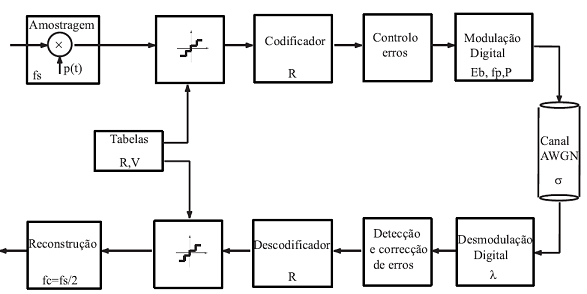

O 1º trabalho foca os blocos Quantificação/ Desquantificação do sinal e Códigos Detectores e Correctores de Erros. 

Além disso inclui uma revisão teórica da Amostragem e Reconstrução.




In [36]:
# imports
import numpy as np
import matplotlib.pyplot as plot
from scipy.fft import fft, fftfreq
from PIL import Image
import scipy.signal as ss
import scipy.io.wavfile as wav
from IPython.display import Audio, display

# A. Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


In [62]:
Fs = 120000
Ts = 1/Fs

t = np.arange(0, 0.002, Ts)

x = 20000*np.cos(2*np.pi*5025*t) + 10000*np.sin(2*np.pi*2507*t)
plt.plot(t,x)
plt.title("1. Sinal no Domínio do Tempo (Fs = 120Khz):")
plt.xlabel("t(s)")
plt.ylabel("x1(t)")
plt.grid()

In [64]:
X = np.fft.fft(x)/len(x)
X_abs = np.abs(X)

X_fk = np.fft.fftfreq(len(x))*Fs

plt.stem(X_fk, X_abs, use_line_collection=True)
plt.title("1. Espetro de Amplitude (Fs = 120Khz):")
plt.xlabel("f(Hz)")
plt.ylabel("A(f)")
plt.axis([-6000, 6000, -0, 11000])

(-6000.0, 6000.0, 0.0, 11000.0)

(-5900.0, 5900.0, -6.283185307179586, 6.283185307179586)

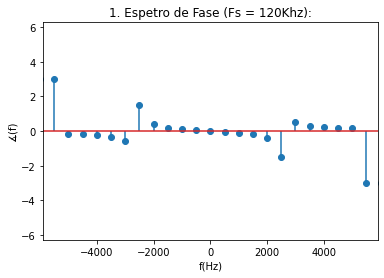

In [66]:
X_ang = np.angle(X)
plt.stem(X_fk, X_ang, use_line_collection=True)
plt.title("1. Espetro de Fase (Fs = 120Khz):")
plt.xlabel("f(Hz)")
plt.ylabel("∡(f)")
plt.axis([-5900, 5900, -2*np.pi, 2*np.pi])

2. Gere o sinal $x(t)$ usando o Python. Cnsidere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


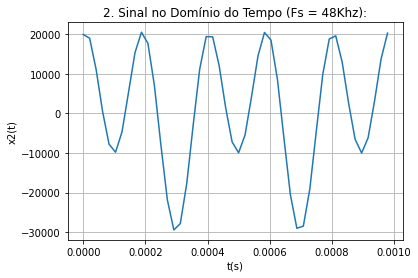

In [132]:
Fs = 48000 
Ts = 1/Fs

t = np.arange(0, 0.001, Ts)
x = 20000*np.cos(2*np.pi*5025*t) + 10000*np.sin(2*np.pi*2507*t)

plt.plot(t,x)
plt.title("2. Sinal no Domínio do Tempo (Fs = 48Khz):")
plt.xlabel("t(s)")
plt.ylabel("x2(t)")
plt.grid()


In [133]:
X = np.fft.fft(x)/len(x)
X_abs = np.abs(X)
X_fk = np.fft.fftfreq(len(x))*Fs

plt.stem(X_fk, X_abs, use_line_collection=True)
plt.title("2. Espetro de Amplitude (Fs = 48Khz):")
plt.xlabel("f(Hz)")
plt.ylabel("A(f)")
plt.axis([-6000, 6000, -0, 11000])


(-6000.0, 6000.0, 0.0, 11000.0)

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

(-6000.0, 6000.0, 0.0, 11000.0)

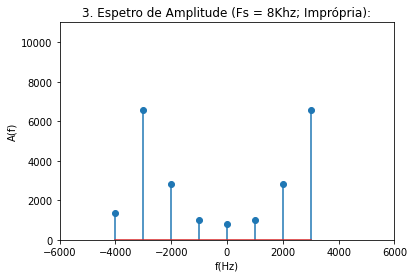

In [134]:
Fs = 8000 
Ts = 1/Fs

t = np.arange(0, 0.001, Ts)
x = 20000*np.cos(2*np.pi*5025*t) + 10000*np.sin(2*np.pi*2507*t)

X = np.fft.fft(x)/len(x)
X_abs = np.abs(X)
X_fk = np.fft.fftfreq(len(x))*Fs

plt.stem(X_fk, X_abs, use_line_collection=True)
plt.xlabel("f(Hz)")
plt.title("3. Espetro de Amplitude (Fs = 8Khz; Imprópria):")
plt.ylabel("A(f)")
plt.axis([-6000, 6000, -0, 11000])


Verifica-se um espetro de muito má qualidade, sinal da presença de aliasing.

# B. Quantificação

4. Construa uma função em Python que crie as tabelas com os valores de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída deve devolver dois Numpy arrays com valores de quantificação e os valores de decisão.

In [101]:
def Quantific(R,Vmax,Qtype):
    # Número de caixas;
    L     = 2**R
    # Tamanho de cada caixa;
    delta  = (2*Vmax)/L
    
    if (Qtype == 'midrise'):

        Iq = np.linspace(-Vmax, Vmax, L+1)

        Vq = np.linspace(-Vmax + delta/2, Vmax - delta/2, L)
        
    elif (Qtype == 'midtread'):
        Iq = np.linspace(-Vmax - delta/2, Vmax - delta/2, L+1) 
        Iq[L] = Vmax
        Iq[0] = -Vmax
        Vq = np.linspace(-Vmax, Vmax-delta, L)
        Vq[L-1] = (Iq[L] + Iq[L-1]) / 2
        Vq[0]   = (Iq[0] + Iq[1]) / 2
        
    else:
        print("Tipo de quantificador não reconhecido!")
        print()
        return None, None
        
    print("Intervalos de Decisão    -> " + str(Iq))
    print("Valores de Quantificação -> " + str(Vq))
    print()
    
    return Vq, Iq

## Verifique se a sua implementação
Realize um conjunto de testes unitários. Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.
* use uma lista de valores (poucos para conseguir validar manualmente)
* use uma arange entre -Vmax e Vmax

In [84]:
Vq, Dq = Quantific(3,1,'midtread')
print('midtread')
print(Vq)
print(Dq)
Vq, Dq = Quantific(3,1,'midrise')
print('midrise')
print(Vq)
print(Dq)

Intervalos de Decisão    -> [-1.    -0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  1.   ]
Valores de Quantificação -> [-0.9375 -0.75   -0.5    -0.25    0.      0.25    0.5     0.8125]

midtread
[-0.9375 -0.75   -0.5    -0.25    0.      0.25    0.5     0.8125]
[-1.    -0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  1.   ]
Intervalos de Decisão    -> [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
Valores de Quantificação -> [-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]

midrise
[-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]


## Implemente o quantificador

Implemente uma função que realize a quantificação


In [85]:

def Quantificador(x, Vq, Iq):
    iq = np.digitize(x, Iq[:-1], right=False)
    xq = Vq[iq-1]
    return xq, iq

## Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

Text(0, 0.5, 'x(t)')

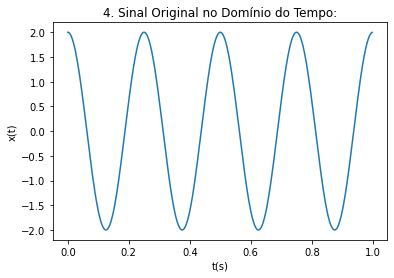

In [86]:
t = np.arange(0, 1, 0.002)
x = 2*np.cos(2*np.pi*4*t)
plt.plot(t, x)
plt.title("4. Sinal Original no Domínio do Tempo:")
plt.xlabel("t(s)")
plt.ylabel("x(t)")

Intervalos de Decisão    -> [-2. -1.  0.  1.  2.]
Valores de Quantificação -> [-1.5 -0.5  0.5  1.5]



Text(0, 0.5, 'xQ(t)')

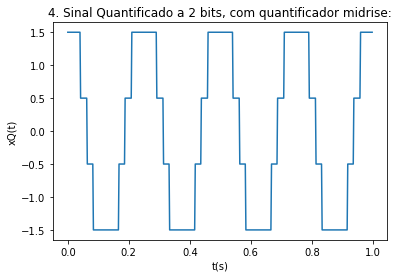

In [87]:
Vq2, Iq2 = Quantific(2, 2,'midrise')
xQuantificado2, indices2 = Quantificador(x, Vq2, Iq2)
plt.plot(t, xQuantificado2)
plt.title("4. Sinal Quantificado a 2 bits, com quantificador midrise:")
plt.xlabel("t(s)")
plt.ylabel("xQ(t)")

Intervalos de Decisão    -> [-2.      -1.96875 -1.9375  -1.90625 -1.875   -1.84375 -1.8125  -1.78125
 -1.75    -1.71875 -1.6875  -1.65625 -1.625   -1.59375 -1.5625  -1.53125
 -1.5     -1.46875 -1.4375  -1.40625 -1.375   -1.34375 -1.3125  -1.28125
 -1.25    -1.21875 -1.1875  -1.15625 -1.125   -1.09375 -1.0625  -1.03125
 -1.      -0.96875 -0.9375  -0.90625 -0.875   -0.84375 -0.8125  -0.78125
 -0.75    -0.71875 -0.6875  -0.65625 -0.625   -0.59375 -0.5625  -0.53125
 -0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0.3125  -0.28125
 -0.25    -0.21875 -0.1875  -0.15625 -0.125   -0.09375 -0.0625  -0.03125
  0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875
  0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875
  1.       1.03125  1.0625   1.09375  1.125    1.15625  1.1875   1.21875
  1.25     1.28125  1.3

Text(0, 0.5, 'xQ(t)')

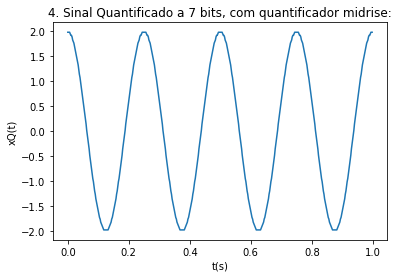

In [88]:
Vq3, Iq3 = Quantific(7, 2,'midrise')
xQuantificado3, indices3 = Quantificador(x, Vq3, Iq3)
plt.plot(t, xQuantificado3)
plt.title("4. Sinal Quantificado a 7 bits, com quantificador midrise:")
plt.xlabel("t(s)")
plt.ylabel("xQ(t)")

Intervalos de Decisão    -> [-2.  -1.5 -0.5  0.5  2. ]
Valores de Quantificação -> [-1.75 -1.    0.    1.25]



Text(0, 0.5, 'xQ(t)')

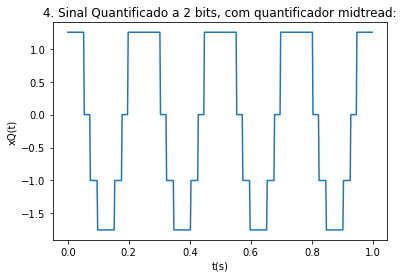

In [89]:
Vq4, Iq4 = Quantific(2, 2,'midtread')
xQuantificado4, indices4 = Quantificador(x, Vq4, Iq4)
plt.plot(t, xQuantificado4)
plt.title("4. Sinal Quantificado a 2 bits, com quantificador midtread:")
plt.xlabel("t(s)")
plt.ylabel("xQ(t)")

Represente o histograma do sinal de erro. Comente os resultados.

## SNR

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [90]:
def Measure_SNRp(x,xq):
  
    Px = np.sum(x**2/len(x))
    Pe = np.sum((xq-x)**2)/len(xq)
    SNRp = 10 * np.log(Px/Pe)
    
    return SNRp

Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [91]:
def Measure_SNRt(R,Vmax,P):
    #resposta
    SNRtdb = 6.02*R + 10*np.log10(3*P/Vmax)
    return SNRtdb

## Testes
Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

## Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

In [92]:
from IPython.display import Audio, display
import scipy.io.wavfile as wav

FBeat, sinalBeat = wav.read("beat.wav")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados.

Intervalos de Decisão    -> [-40000. -30000. -20000. -10000.      0.  10000.  20000.  30000.  40000.]
Valores de Quantificação -> [-35000. -25000. -15000.  -5000.   5000.  15000.  25000.  35000.]

Intervalos de Decisão    -> [-40000. -35000. -30000. -25000. -20000. -15000. -10000.  -5000.      0.
   5000.  10000.  15000.  20000.  25000.  30000.  35000.  40000.]
Valores de Quantificação -> [-37500. -32500. -27500. -22500. -17500. -12500.  -7500.  -2500.   2500.
   7500.  12500.  17500.  22500.  27500.  32500.  37500.]

Intervalos de Decisão    -> [-40000. -37500. -35000. -32500. -30000. -27500. -25000. -22500. -20000.
 -17500. -15000. -12500. -10000.  -7500.  -5000.  -2500.      0.   2500.
   5000.   7500.  10000.  12500.  15000.  17500.  20000.  22500.  25000.
  27500.  30000.  32500.  35000.  37500.  40000.]
Valores de Quantificação -> [-38750. -36250. -33750. -31250. -28750. -26250. -23750. -21250. -18750.
 -16250. -13750. -11250.  -8750.  -6250.  -3750.  -1250.   1250.   3750.
   62

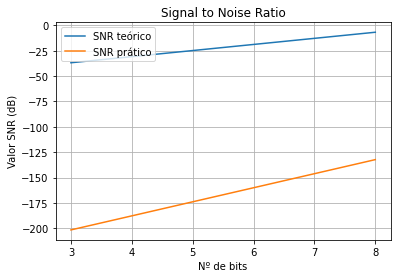

In [104]:
R = [3, 4, 5, 6, 7, 8]
valores_SNRpBeat = []
valores_SNRtBeat = []

# Quantificação utilizando cada um dos valores
for valor_R in R:
    VqBeat, IqBeat = Quantific(valor_R, 40000,'midrise')
    sinalBeatQuantific, indicesBeat = Quantificador(sinalBeat, VqBeat, IqBeat)
    #Guardamos o valor do SNR para cada
    valores_SNRpBeat.append(Measure_SNRp(sinalBeat, sinalBeatQuantific))
    valores_SNRtBeat.append(Measure_SNRt(valor_R,  40000, np.sum(sinalBeat**2 / len(sinalBeat))))

#plot dos valores obtidos
plt.plot(R, valores_SNRtBeat, label="SNR teórico")
plt.plot(R, valores_SNRpBeat, label="SNR prático")

plt.title("Signal to Noise Ratio")  
plt.xlabel("Nº de bits")         
plt.ylabel("Valor SNR (dB)")
plt.grid()
plt.legend(loc="upper left")

# Valores de SNR negativo (em decibeis*), como se verifica no grafico, significa que a potência do sinal é inferior
# à potência do ruido, devido ao mencionado.

## Imagem
Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

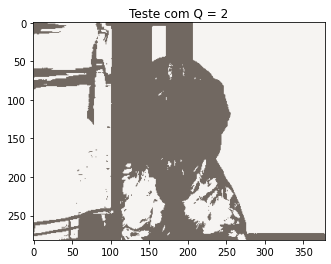

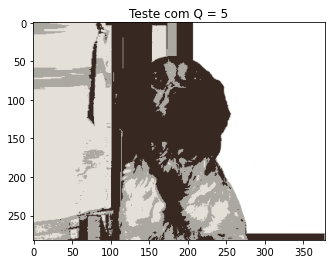

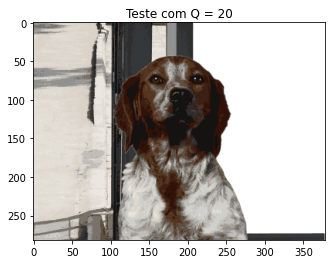

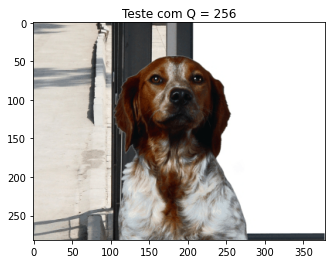

In [94]:
from PIL import Image
im = Image.open("dog.tif")
    
# Array com valores para a função, consideramos 256 o valor máximo
Q = [2, 5, 20, 256]

for v in Q:
    # A função para imagens .quantize() recebe como argumento o número de cores com que a imagem será
    # quanto maior for o Q mais detalhada a imagem fica
    im.quantize(v).show()
    plt.imshow(im.quantize(v))
    plt.title('Teste com Q = ' + str(v))
    plt.show()



# C. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [95]:
import numpy as np
import matplotlib.pyplot as plt


def Codific(arr_signal_quantized,R):

    reshaped = arr_signal_quantized.reshape(arr_signal_quantized.size, 1)

    binary_flipped = np.unpackbits(reshaped.view(np.uint8), axis=1, count=R, bitorder='little')

    arr_binary = np.flip(binary_flipped, axis=1).reshape(arr_signal_quantized.size*R)

    return arr_binary


Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [111]:
def Descodific(arr_binary,R):     
    arrays = []     
    x=0;     
    ze = R    
    for z in range(int(len(arr_binary)/R)):                  
        arraya = arr_binary[x:ze]                  
        arraya = "".join(map(str,arraya))                  
        arrays.append(arraya)                  
        x=x+R                 
        ze = ze + R             
    arrays = list(map(lambda z: int(z, 2),arrays))          
    #print(arrays)          
    return np.array(arrays)

        
arr = np.array([1,2,3,4,5,6,7,8,9,10])          
code = Codific(arr,10)          
decode = Descodific(code,10)          
print("array:")     
print(arr)     
print("array codificado:")     
print(code)     
print("array decodificado:")     
print(decode)

array:
[ 1  2  3  4  5  6  7  8  9 10]
array codificado:
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0]
array decodificado:
[ 1  2  3  4  5  6  7  8  9 10]


Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

## Canal - O canal é modelado pelo modelo Binary Symmetric Channel [BSC](https://en.wikipedia.org/wiki/Binary_symmetric_channel)

Com as duas funções realizadas e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão  𝑦=1∗𝑛𝑝.𝑙𝑜𝑔𝑖𝑐𝑎𝑙_𝑥𝑜𝑟(𝑥,𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1,𝐵𝐸𝑅𝑡,𝑙𝑒𝑛(𝑥))) , onde  𝐵𝐸𝑅𝑡  contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de  𝐵𝐸𝑅𝑡 .

In [127]:
#x - array de bits a entrar no canal
#y - array de bits a sair do canal



Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.

# D.  Deteção e Correção de erros 

Deteção e Correção de erros
Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [98]:
import numpy as np
G=np.array([[1,0,0,0,1,1,0],[0,1,0,0,1,0,1],[0,0,1,0,0,1,1],[0,0,0,1,1,1,1]])
print(G)

[[1 0 0 0 1 1 0]
 [0 1 0 0 1 0 1]
 [0 0 1 0 0 1 1]
 [0 0 0 1 1 1 1]]


In [121]:
def Hamming_7_4(arr_bits):
  
    return arr_bits.dot(G) % 2

Construa uma função que dado um Numpy array M bits, para cada 8 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [122]:
Ht = np.array([[0,1,1,1],
              [1,1,1,0],
              [1,0,1,1],
              [1,1,0,1],
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]])

def Detetor(arr_binary):

    arr_bits = np.zeros((len(arr_binary),4))
    s = np.dot(arr_binary, Ht) % 2

    if(s.sum()>0):
        for h in range(len(Ht)):
          if(np.array_equa(Ht[h],s)):
            if arr_binary[h]==0:
              arr_binary[h] = 1
            else:
              arr_binary[h] = 0
    for x in range(len(arr_binary)):
        arr_binary[x] = arr_binary[0:4]  
    #resposta
    return arr_bits

Faça um conjunto de testes para verificar o correto funcionamento das funções.

In [129]:

print ("resultado - " + str(Hamming_7_4(np.array([1,1,0,1]))) + "\n")


print ("resultado - " + str(Hamming_7_4(np.array([1,0,0,1]))) + "\n")

resultado - [1 1 0 1 1 0 0]

resultado - [1 0 0 1 0 0 1]



Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER após a correcção de erros, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.